# Vader

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np 
import nltk
import matplotlib.pyplot as plt
import warnings

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
# Import the data set.
speech_vader = pd.read_csv('speech_vader_1.csv')

# View the DataFrame.
speech_vader.head()

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,"Thank you, Chairman. I'm actually very pleased..."
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,It's a great pleasure to be here in the beauti...
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,Few industries have suffered more from volatil...
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,My topic this evening is the use of forecasts ...
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,"Six years ago this week, sterling left the exc..."


In [3]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [4]:
# Let's apply the sentiment intensity analyser
speech_vader['vader_sentiment'] = speech_vader['clean_text'].apply(lambda x: sia.polarity_scores(x))

In [5]:
# For future comparisons, including those with TextBlob and visualisations, it is
# necessary to separately store 'compound' sentiment scores. 
# This allows for direct comparison between different sentiment analysis methods.

# Extract 'compound' sentiment scores and store in a new column prefixed with 'vader_'
speech_vader['vader_compound'] = speech_vader['vader_sentiment'].apply(lambda x: x['compound'])

# Extract 'pos' sentiment scores and store in a new column prefixed with 'vader_'
speech_vader['vader_pos'] = speech_vader['vader_sentiment'].apply(lambda x: x['pos'])

# Extract 'neg' sentiment scores and store in a new column prefixed with 'vader_'
speech_vader['vader_neg'] = speech_vader['vader_sentiment'].apply(lambda x: x['neg'])

# Extract 'neu' sentiment scores and store in a new column prefixed with 'vader_'
speech_vader['vader_neu'] = speech_vader['vader_sentiment'].apply(lambda x: x['neu'])

In [6]:
# We don't need the sentiment column
speech_vader = speech_vader.drop('vader_sentiment', axis=1)

In [7]:
# View the DataFrame.
speech_vader.head()

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,vader_compound,vader_pos,vader_neg,vader_neu
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,"Thank you, Chairman. I'm actually very pleased...",0.9968,0.104,0.084,0.812
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,It's a great pleasure to be here in the beauti...,0.9999,0.157,0.076,0.767
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,Few industries have suffered more from volatil...,0.9982,0.118,0.081,0.801
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,My topic this evening is the use of forecasts ...,0.9997,0.096,0.049,0.855
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,"Six years ago this week, sterling left the exc...",0.9988,0.092,0.071,0.837


The key takeaway is that the compound score captures the overall sentiment intensity, not just the balance of positive versus negative language. 
- This allows it to indicate a strong positive sentiment even when the explicitly positive content makes up a smaller portion of the text, especially if that positive content is very strongly positive.
- This is the rule based approach that gives Vader a better understanding of full context. 

In [8]:
# Using the square-root rule to determine histogram bins
print(int(np.sqrt(len(speech_vader['vader_compound']))))

34


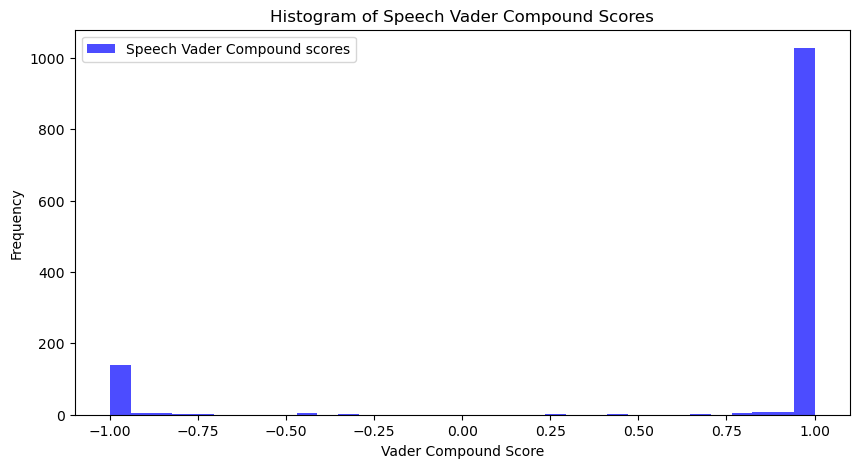

In [9]:
# Histogram for speech_vader_compound
plt.figure(figsize=(10, 5))
plt.hist(
    speech_vader['vader_compound'],
    bins=34,
    alpha=0.7,
    color='blue',
    label='Speech Vader Compound scores'
)
plt.title('Histogram of Speech Vader Compound Scores')
plt.xlabel('Vader Compound Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- This is unlikely to reflect how the Bank of England chooses the tone of its speeches so we have to assume again that Vader’s more generalised lexicon is not appropriate for more financial contexts. 
- Since Vader is particularly useful at analysing language like social media, Vader’s method of analysing intensity might be picking up on the presence of strong financial jargon and interpreting it as carrying more sentiment weight than intended.

In [10]:
speech_vader['vader_compound'].describe()

count    1209.000000
mean        0.735447
std         0.664696
min        -1.000000
25%         0.996400
50%         0.999400
75%         0.999800
max         1.000000
Name: vader_compound, dtype: float64

- Mean: The average sentiment score is very high (0.735447), indicating a extremely positive sentiment across the dataset.
- Standard Deviation: The standard deviation is significant too (0.664696), suggesting a wide range of sentiment scores from highly negative to highly positive.
- Minimum: The lowest sentiment score is -1.000000, indicating the presence of extremely negative sentiments in some instances.
- 25th Percentile: This value is very high (0.996400), which is unusual for sentiment scores and suggests that 25% of the data has very high positive scores, just below the maximum. 
- Median (50th Percentile): The median is 0.999400, extremely close to the maximum, again showing a very strong positive sentiment within the dataset.
- 75th Percentile: With 75% of scores below 0.999800, we see that the vast majority of the dataset skews towards the maximum positive score.
- Maximum: The highest sentiment score is 1.000000, the highest possible score, indicating extremely positive sentiments.

In [11]:
# speech_vader.to_csv('vader_scores.csv',index=False)